# Cars Classification on the Stanford dataset (fastai)


First, import fastai vision package and opencv. The fastai library uses Pytorch as a backend.

[link] https://docs.fast.ai/ 

In [38]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio

## Prepare data batches
Fastai allows an easy way to create the data batches and apply some augmentation techniques, ImageDataBunch would create ready to use image batches and apply the specified transformations.

In [39]:

data = ImageDataBunch.from_folder('./tmp/',
                                  train='train',
                                  valid='valid',
                                  test='test',
        
                                  ds_tfms=get_transforms(do_flip=False, 
                                                         flip_vert=True, 
                                                         max_rotate=5.0, 
                                                         max_zoom=1, 
                                                         max_lighting=0.2,
                    
                                                         max_warp=0.2, 
                                                         p_affine=0.75, 
                                                         p_lighting=0.75)
                                  ,size=512,bs=8).normalize(imagenet_stats)

In [40]:
data

ImageDataBunch;

Train: LabelList (27848 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
0125,0125,0125,0125,0125
Path: tmp;

Valid: LabelList (4728 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
0125,0125,0125,0125,0125
Path: tmp;

Test: LabelList (8041 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: tmp

## A look into a batch 

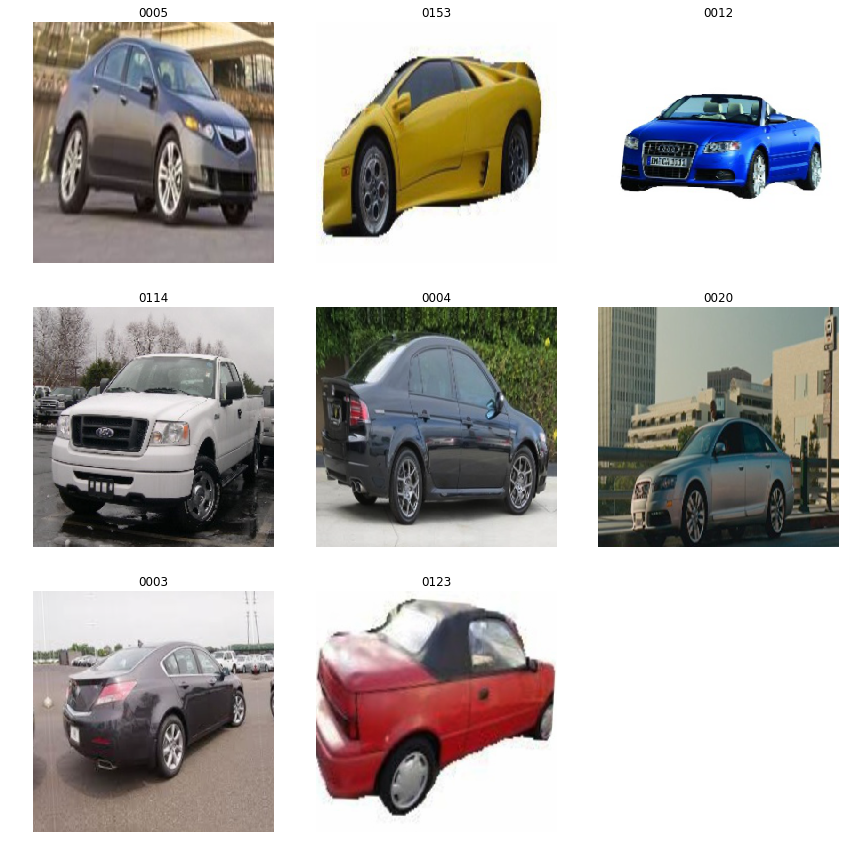

In [41]:
data.show_batch()

In [42]:
# class names and number of classes
print(data.classes)
len(data.classes),data.c


['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125',

(196, 196)

## Prediction

In [43]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [44]:
learn.load('stanford-cars-mixed_v')

Learner(data=ImageDataBunch;

Train: LabelList (27848 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
0125,0125,0125,0125,0125
Path: tmp;

Valid: LabelList (4728 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
0125,0125,0125,0125,0125
Path: tmp;

Test: LabelList (8041 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: tmp, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel

## Results
In the following cells, let's take a look at the images that the model predicted wrong, We can see that in some cases the model makes wrong predictions between two cars of the same make but not the same model and/or year which is normal since it is very difficult even for a human being to differentiate between them.

e.i. class 0019 'Audi TT Hatchback 2011' and class 0022 'Audi S5 Coupe 2012'

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

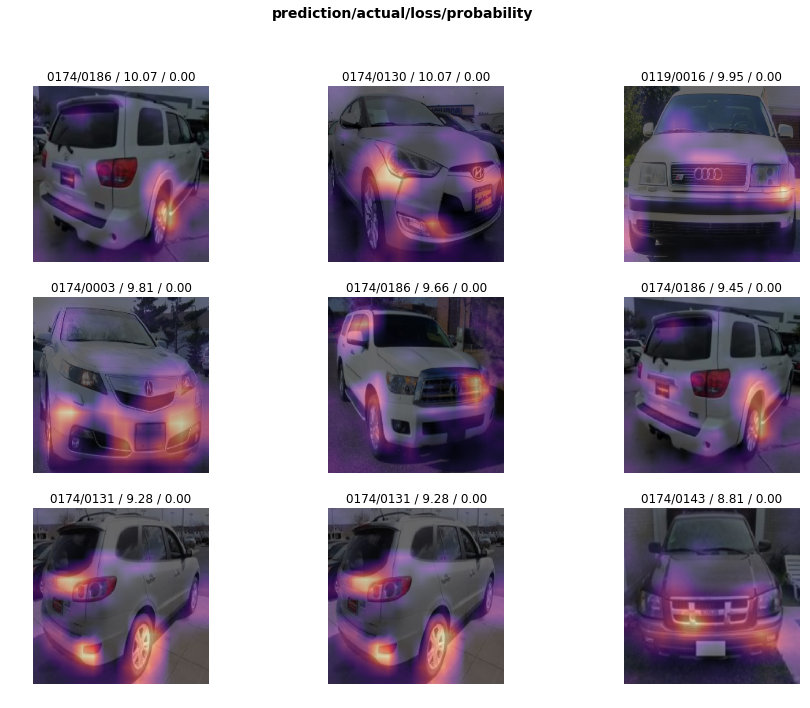

In [46]:
interp.plot_top_losses(9, figsize=(15,11))

Notice the model starts to over-fit, but I can't help with that 
# Predictions on the test set by folder
## Preprocessing the test set 
I have used the labels provided by 'cars_test_annos_withlabels.mat' to create a csv file and used it in the ImageList to prepare the test batches. 

In [52]:
# labels = sio.loadmat('//home//jupyter//.fastai//data//cars_test_annos_withlabels.mat')
labels = sio.loadmat('./devkit/cars_test_annos_withlabels.mat')

In [53]:
x = []
for i in range(8041):
    x.append(np.transpose(np.array(labels['annotations']['fname']))[i][0][0])


In [54]:
cars_meta = sio.loadmat('./devkit/cars_meta.mat')
cars_meta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'class_names': array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
         array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
         array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
       dtype=object)}

In [55]:
label_as_text = [cars_meta['class_names'][0][i][0] for i in range(len(cars_meta['class_names'][0]))]
print(len(label_as_text))

196


In [56]:
def label_number_to_text(predicted_class, label_as_text):
    return label_as_text[predicted_class]

In [57]:
label_as_number = np.array(labels['annotations']['class'],dtype=np.int)[0]
# label_as_text = 
label_as_number

array([181, 103, 145, 187, ...,  16,  17,  38,  32])

In [58]:
df=pd.DataFrame(data=np.transpose(np.array(labels['annotations']['class'],dtype=np.int)),
                  index=x)

In [59]:
df.to_csv('./devkit/test_labels.csv')

In [60]:
learn.export('export.pkl')

In [61]:
try:
    os.makedirs('tmp')
except FileExistsError:
    pass

In [62]:
learn = load_learner('tmp', test= ImageList.from_csv('./','devkit/test_labels.csv',folder='./tmp/test'))
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [63]:
# preds, y,losses = learn.get_preds(DatasetType.Test, with_loss=True)

In [64]:
a=preds;a.shape

torch.Size([8041, 196])

In [65]:
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape #lbels in range [0..195]
b = torch.from_numpy(b)

In [ ]:
acc=accuracy(a,b);acc
# Resnet50 tensor(0.8447)
# my resnet34 mixed data tensor(0.0440)???
# resnet50 mixed crop image and original tensor(0.7839)
# resnet50 mixed crop image and original tensor(0.7707)

#There is an error in loading the export.pkl

# Predictions on the single image

In [68]:
import fastai

In [105]:
path = Path('./tmp/')
folder = 'test'
img = open_image(path/folder/'00002.jpg')

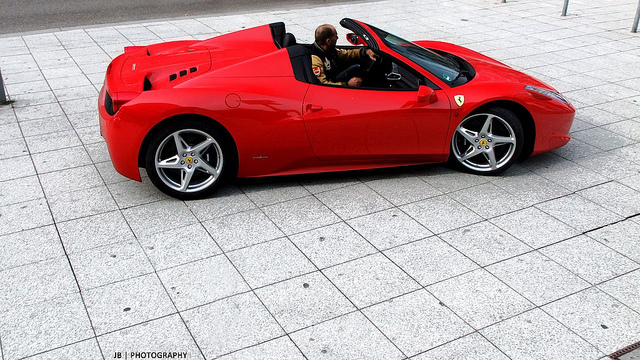

In [106]:
img

In [107]:
classes = [i for i in range(196)]

In [108]:
data2 = ImageDataBunch.single_from_classes(path, classes,  size=224).normalize(imagenet_stats)

In [109]:
learn = cnn_learner(data2, models.resnet50).load('stanford-cars-mixed_v')

In [110]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 102

In [124]:
def get_conf(outputs,pred_class):
    pred_class = int(pred_class)
    return float(outputs[pred_class])*100

In [125]:
pred_class = int(pred_class)
pred_class_text = label_number_to_text(pred_class, label_as_text)
pred_class_conf = get_conf(outputs,pred_class)
pred_class_text, pred_class_conf

('Ferrari 458 Italia Convertible 2012', 99.03849363327026)